### Introduction

### The credit risk customers dataset contains information about customers who have applied for a loan. The data is primarily focused on personal and financial information of the customers. It is a labeled dataset, where the target variable is a binary classification of good or bad credit risk. The data was collected from a German bank and contains 1000 rows and 21 columns. Link to the dataset https://www.kaggle.com/datasets/ppb00x/credit-risk-customers. 

### The dataset includes information such as the customer's credit history, purpose of the credit, amount of credit, duration of the credit, employment status, income, and demographic information. The target variable 'class' represents the creditworthiness of the customer, with a value of '1' indicating a good credit risk and a value of '2' indicating a bad credit risk.

### The dataset can be used to build models to predict credit risk based on the customer's personal and financial information. It can also be used to analyze patterns in customer behavior, demographics, and credit history.

In [1]:
#importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder


### Data Wrangling 


In [2]:
#importing the Datasets.

data = pd.read_csv('credit_customers.csv')

In [3]:
#showing the first 5 rows of the datasets
data.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [4]:
#printing all the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

### Describing the Data Columns

 ### checking_status: the status of the customer's checking account
 ### duration: the duration of the loan in months
 ### credit_history: the credit history of the customer
 ### purpose: the purpose of the credit
 ### credit_amount: the amount of the credit
 ### savings_status: the status of the customer's savings account
 ### employment: the length of time the customer has been employed
 ### installment_commitment: the installment rate in percentage of disposable income
 ### personal_status: the customer's personal status
 ### other_parties: whether there are other people responsible for the credit
 ### residence_since: the length of time the customer has been living at their current residence
 ### property_magnitude: the value of the customer's property
 ### age: the age of the customer
 ### other_payment_plans: other existing payment plans the customer has
 ### housing: the type of housing the customer has
 ### existing_credits: the number of existing credits the customer has
 ### job: the customer's type of job
 ### num_dependents: the number of dependents the customer has
 ### own_telephone: whether the customer has their own telephone
 ### foreign_worker: whether the customer is a foreign worker
 ### class: the target variable indicating whether the customer is a good or bad credit risk

In [5]:
# describing the data, by shwoing the count, mean, standard devuation, minimum , 25%, 50%,75% and maximum
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
#defining the data column types 
data.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

In [7]:
# Remove outliers using Z-score method

z_scores = np.abs((data['credit_amount'] - data['credit_amount'].mean()) / data['credit_amount'].std())
data = data[z_scores < 3]

### Descriptive Analysis and Diagnostic Analysis  

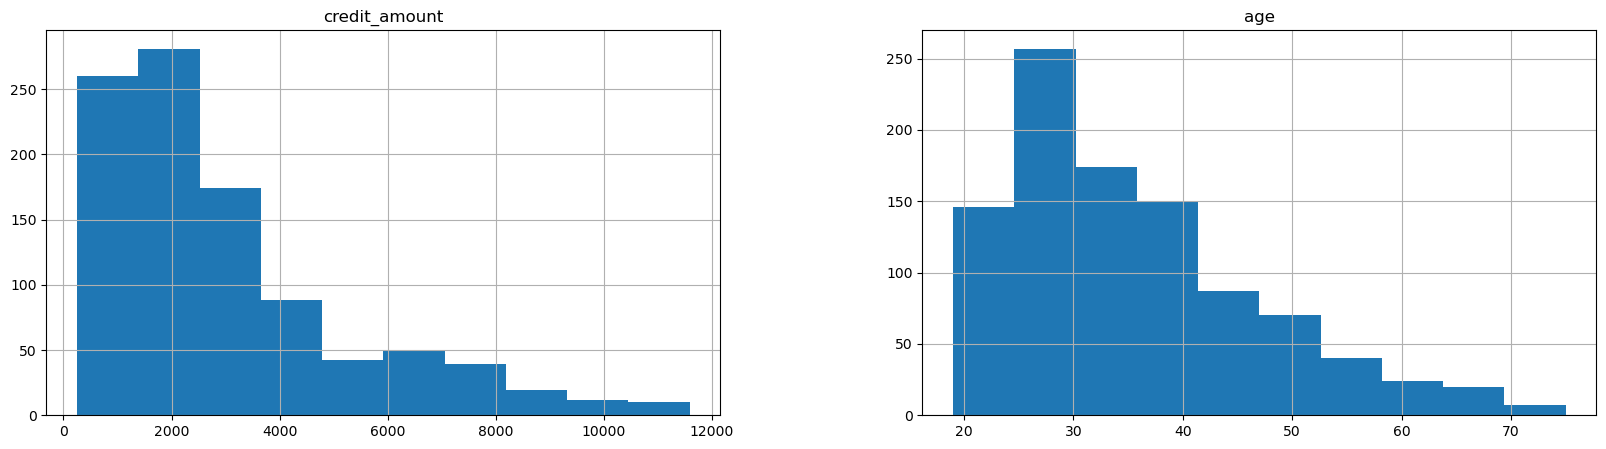

In [8]:
#This will give us a summary of the numerical variables in the dataset.
#Plotting histograms to visualize the distribution of two variable which are credit_amount and age 

columns = ['credit_amount', 'age']
data[columns].hist(bins=10, figsize=(20,5))
plt.show()

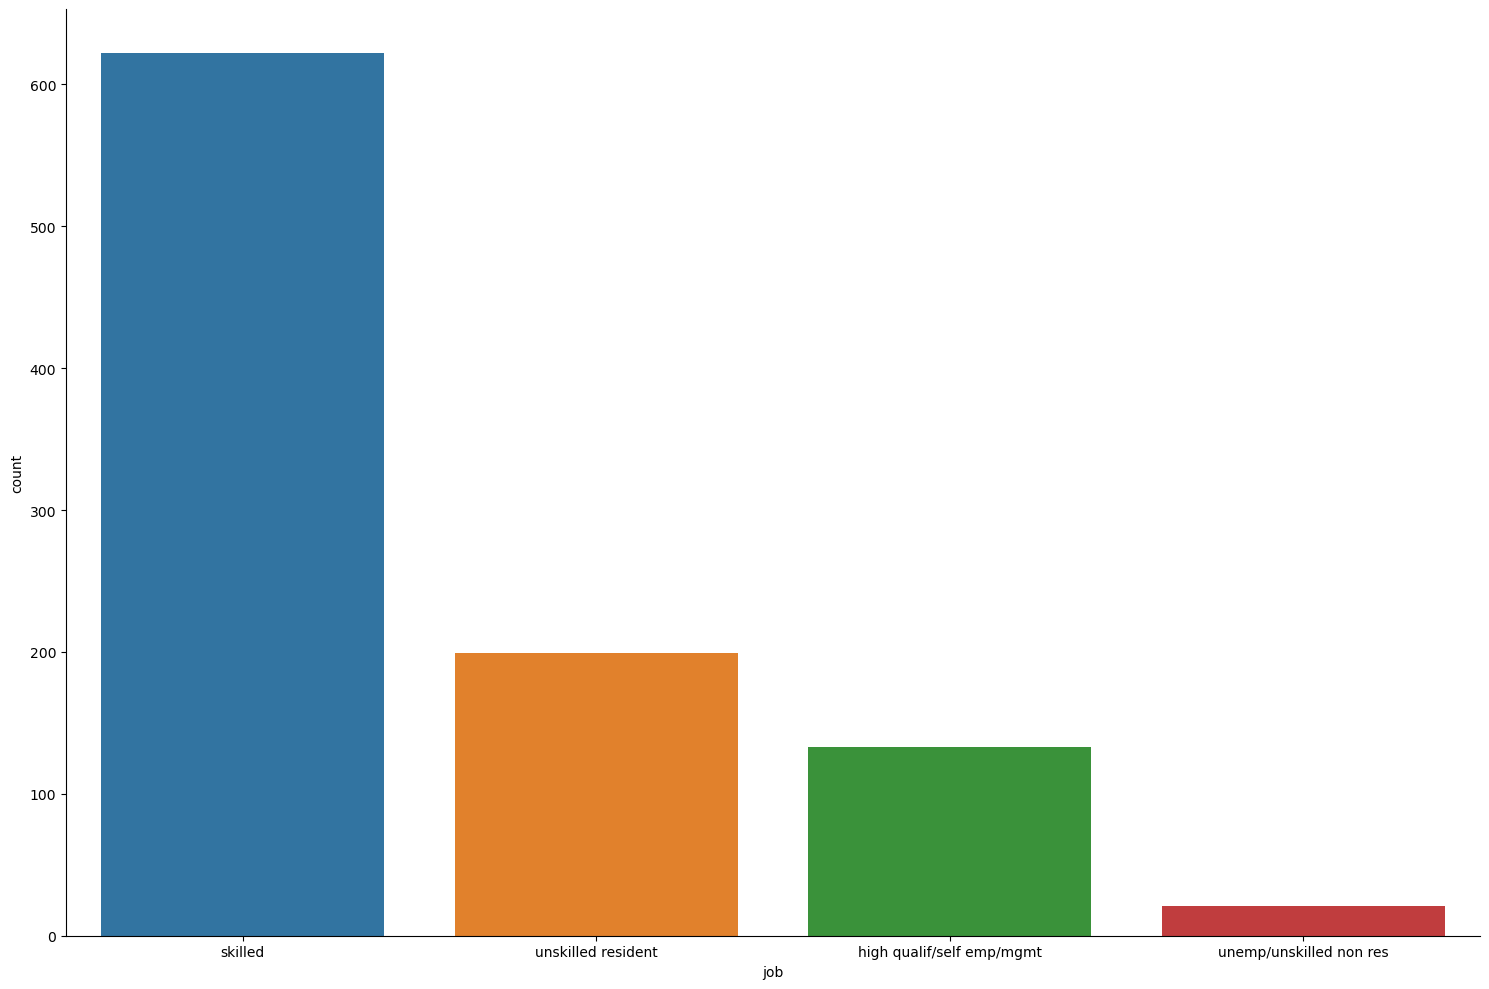

In [9]:
#plotting a catplot to showing the count of each jobs 
sns.catplot(kind = 'count',
           data = data,
           x = 'job', height=10, aspect=1.5)

#display chart
plt.show()

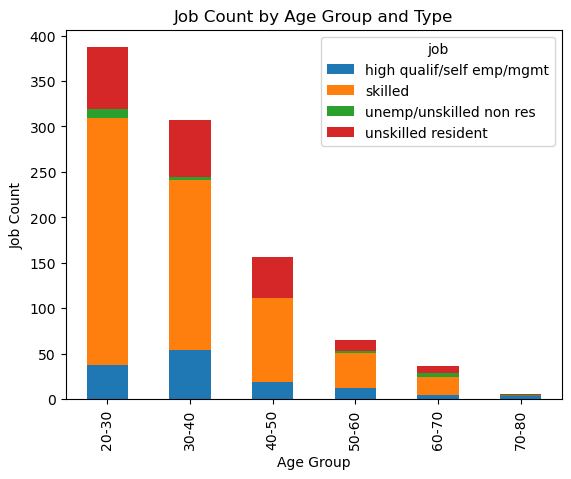

In [10]:
#plotting a bar chart to showing the job type by age group and type 

# Define the age groups
age_groups = pd.cut(data['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

# Calculate the count of jobs by age group and job type
job_counts = data.groupby([age_groups, 'job'])['job'].count().unstack()

# Plot the bar chart
job_counts.plot(kind='bar', stacked=True)

# Add labels and title to the chart
plt.xlabel('Age Group')
plt.ylabel('Job Count')
plt.title('Job Count by Age Group and Type')

# Display the chart
plt.show()

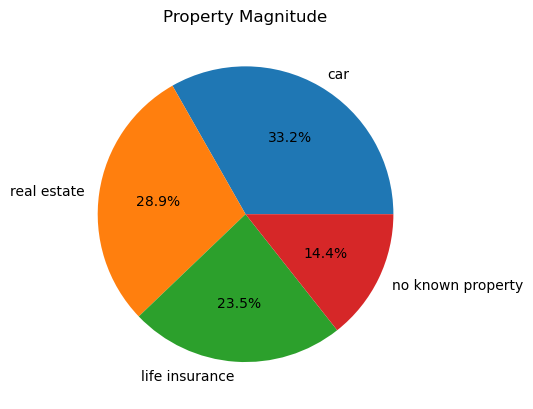

In [11]:
#plotting a pie chart for property_magnitude columns and showing the percentage range of the attributes in the column

# Calculate the count of each education level
property_magnitude_counts = data['property_magnitude'].value_counts()

# Plot the pie chart
plt.pie(property_magnitude_counts , labels=property_magnitude_counts.index, autopct='%1.1f%%')

# Add title to the chart
plt.title('Property Magnitude')

# Display the chart
plt.show()


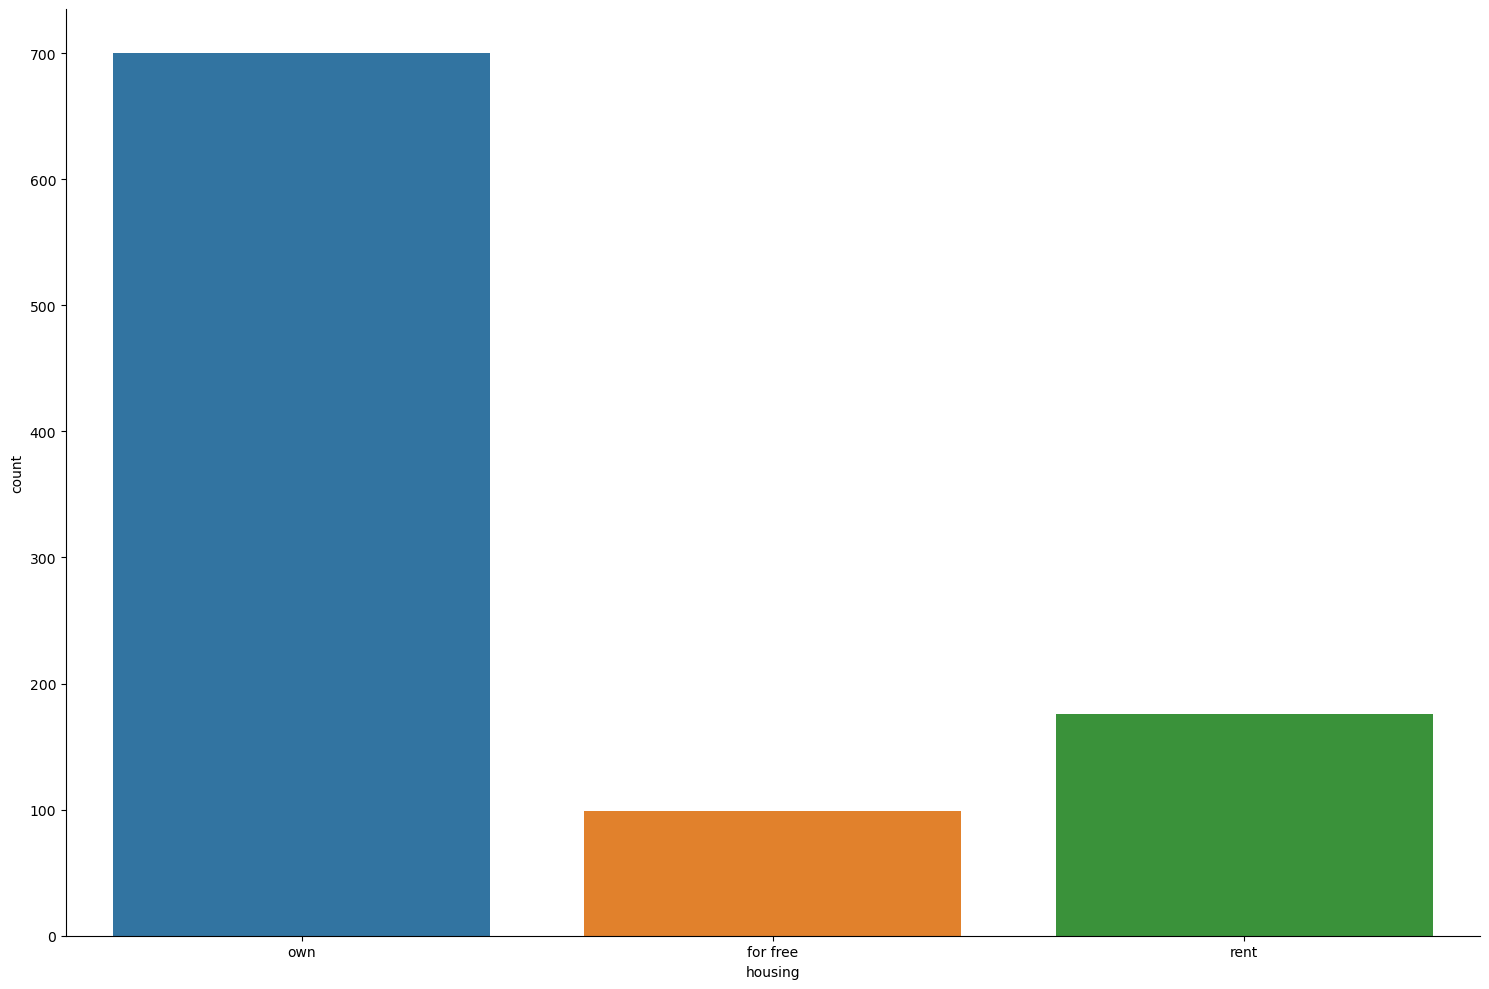

In [12]:
#plotting a catplot to show th count of the housing column 
#plot catplot
sns.catplot(kind = 'count',
           data = data,
           x = 'housing', height=10, aspect=1.5)


#display chart
plt.show()

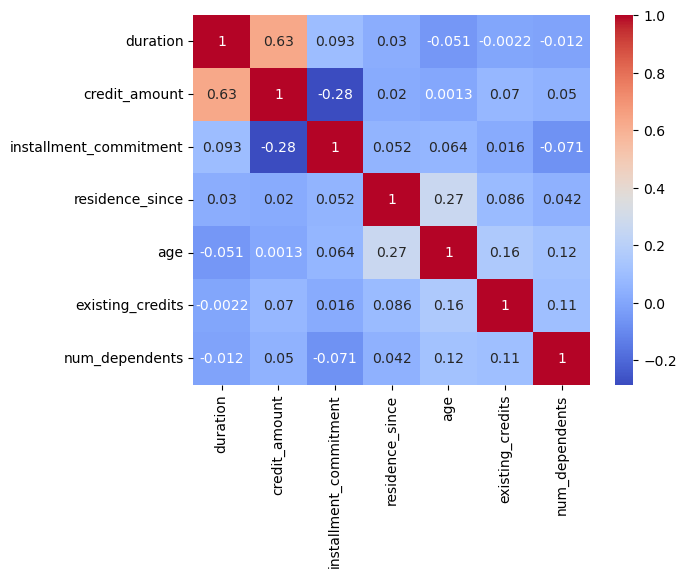

In [13]:
#verifying the correlation between our variables.

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Display the plot
plt.show()

<AxesSubplot:title={'center':'Boxplot credit_amount'}, xlabel='credit_amount'>

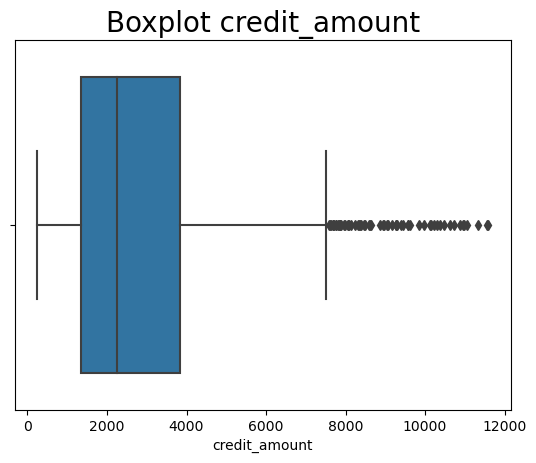

In [14]:
#plotting a box plot for the credit_amount 

plt.title("Boxplot credit_amount", fontdict = {'fontsize': 20})
sns.boxplot(x=data["credit_amount"])

<AxesSubplot:title={'center':'Boxplot age'}, xlabel='age'>

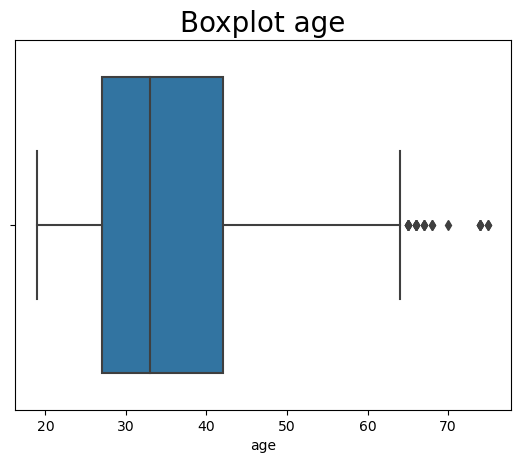

In [15]:
#plotting a box plot for the age

plt.title("Boxplot age", fontdict = {'fontsize': 20})
sns.boxplot(x=data["age"])

<AxesSubplot:xlabel='class', ylabel='age'>

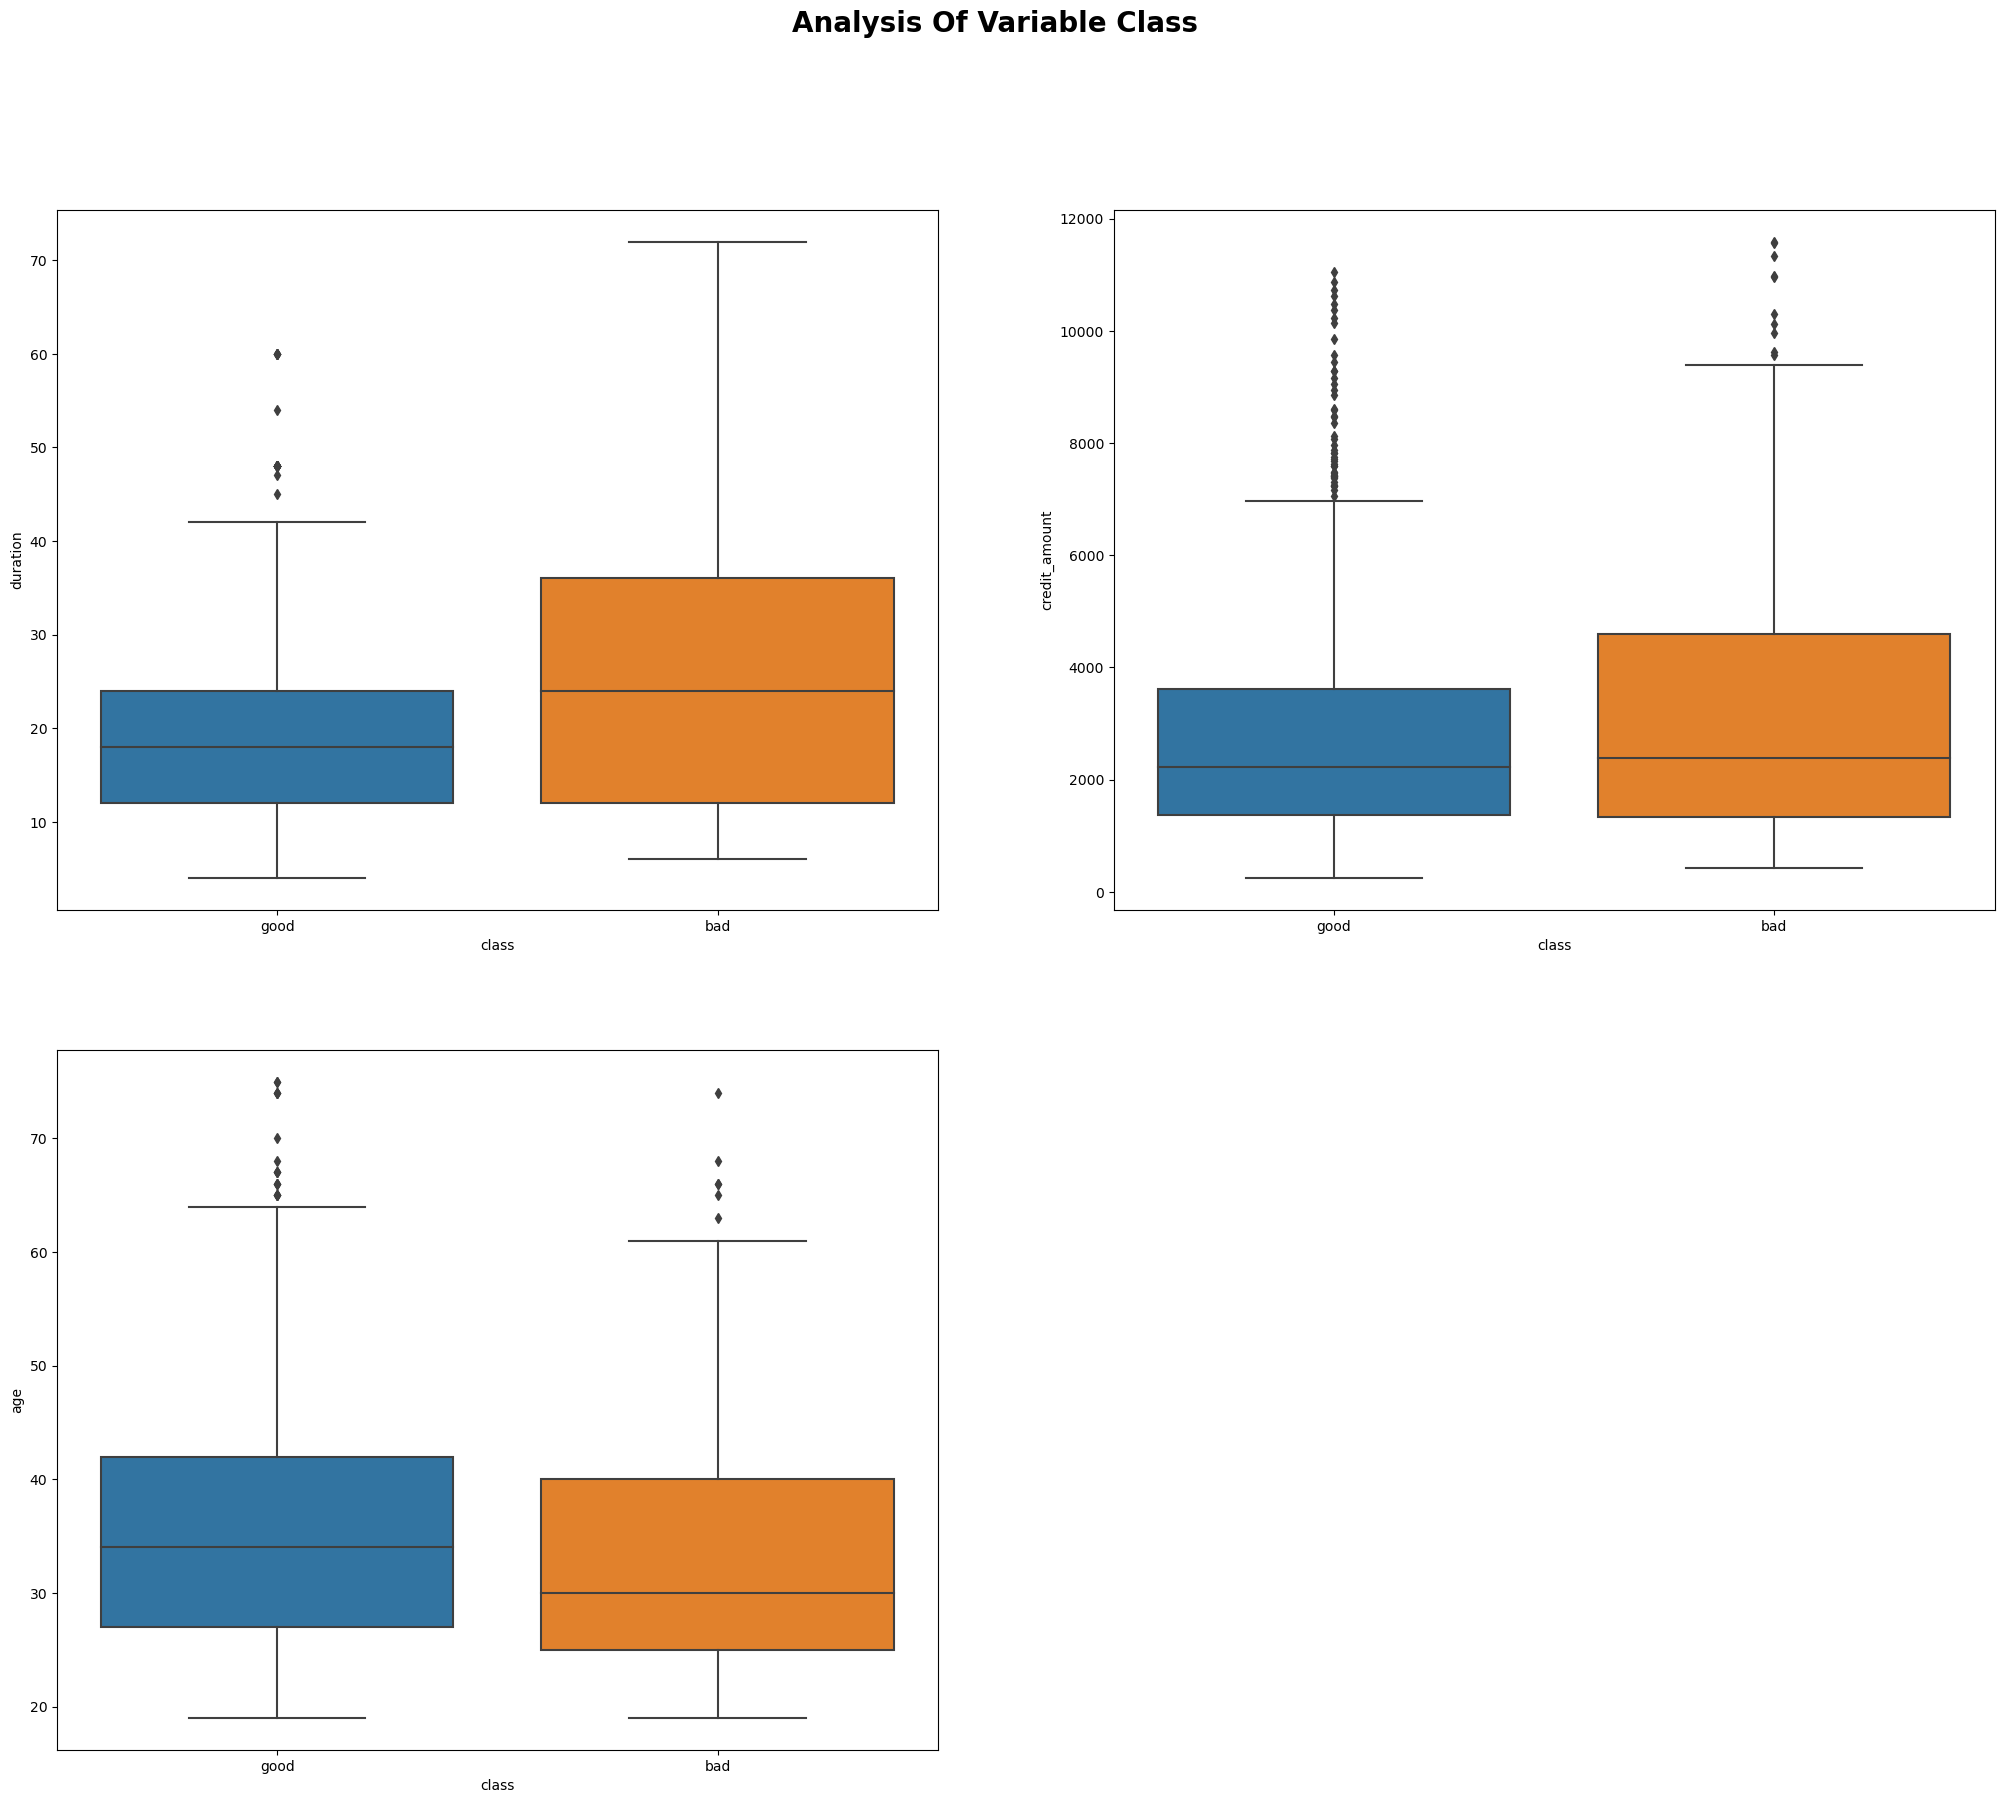

In [16]:
#plotting a boxplot of class by different variable/column
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Class",fontweight="bold", fontsize=20)

plt.subplot(2,2,1)
sns.boxplot(x="class", y="duration", data=data)

plt.subplot(2,2,2)
sns.boxplot(x="class", y="credit_amount", data=data)

plt.subplot(2,2,3)
sns.boxplot(x="class", y="age", data=data)

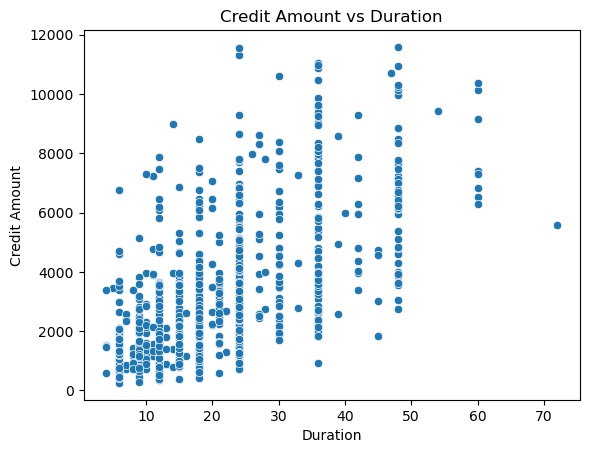

In [17]:
# Scatter plot of credit amount by duration

sns.scatterplot(x='duration', y='credit_amount', data=data)
plt.title('Credit Amount vs Duration')
plt.xlabel('Duration')
plt.ylabel('Credit Amount')
plt.show()

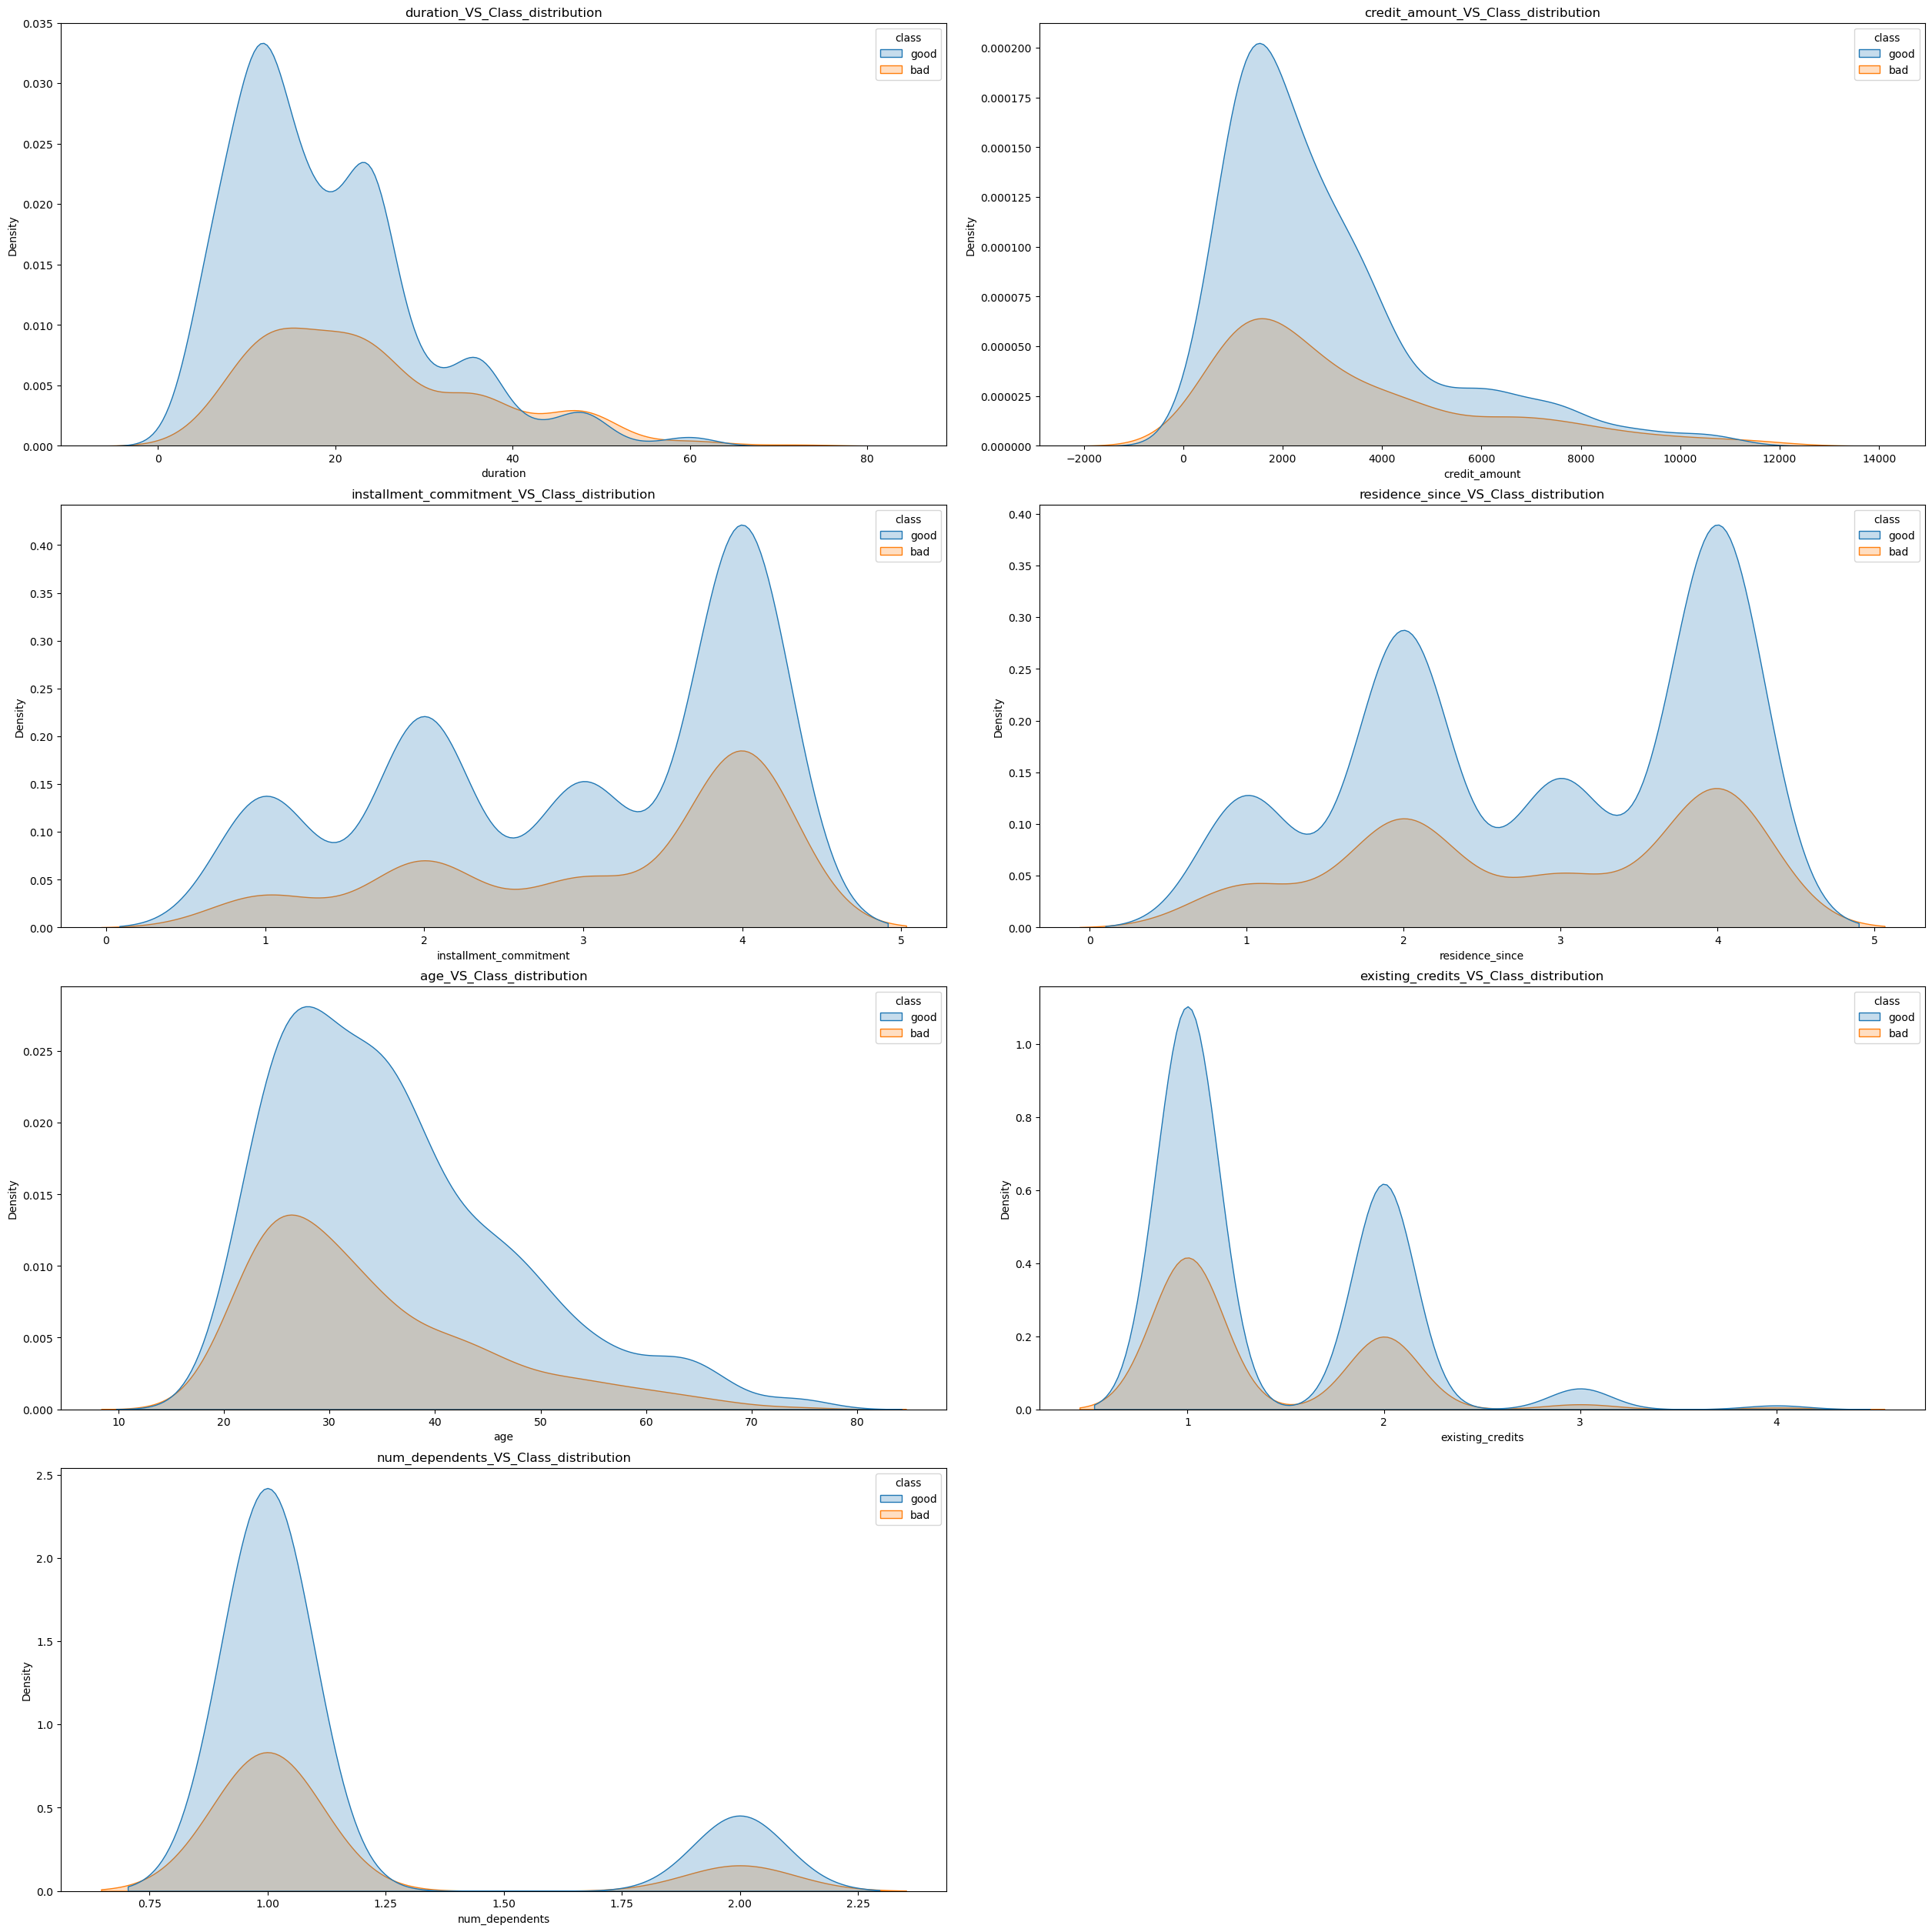

In [18]:
lst=['duration', 'credit_amount', 'installment_commitment','residence_since', 'age', 'existing_credits', 'num_dependents']
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(lst)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(data= data,x=lst[i],hue='class',shade=True)
    plt.title(lst[i]+'_VS_Class_distribution')
plt.show()

### Predictive Analysis


In [19]:

X = data.drop('class',axis=1)
y = data['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [20]:
hot = pd.get_dummies(data[['credit_history', 'checking_status', 'purpose', 'savings_status', 
                        'employment', 'personal_status', 'other_parties', 
                        'installment_commitment', 'residence_since', 'property_magnitude', 
                        'other_payment_plans', 'housing', 'existing_credits', 
                        'job', 'num_dependents', 'own_telephone', 'foreign_worker']])

In [21]:
data = pd.concat([data, hot], axis = 1)
data = data.drop(['credit_history', 'checking_status', 'purpose', 'savings_status', 
                        'employment', 'personal_status', 'other_parties', 
                        'installment_commitment', 'residence_since', 'property_magnitude', 
                        'other_payment_plans', 'housing', 'existing_credits', 
                        'job', 'num_dependents', 'own_telephone', 'foreign_worker'], axis = 1)

In [22]:
label_encoder_class = LabelEncoder()
data['class'] = label_encoder_class.fit_transform(data['class'])

In [23]:
#Separating into features variables and target variable.

X = data.drop('class', axis = 1)
X = X.values
y = data['class']

In [24]:
#here we are carrying out a standard scaler to put the dataframe in the same scale 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [25]:
#training the dataset into train e test, here I will be use 30% of the data to test the machine learning models 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [26]:
X_train.shape, y_train.shape

((780, 57), (780,))

In [27]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

In [28]:
#This code is generating a classification report for a Naive Bayes Gaussian model.

classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.48      0.72      0.58        58
           1       0.85      0.67      0.75       137

    accuracy                           0.69       195
   macro avg       0.67      0.70      0.67       195
weighted avg       0.74      0.69      0.70       195



### The classification_report function from scikit-learn's metrics module takes as input the true target values and the predicted values for a classification problem, and returns a report containing several metrics such as precision, recall, and f1-score, which are used to evaluate the performance of the mode

In [29]:
#This code is fitting a decision tree classifier to the training data

decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 9, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

In [30]:
#The classifier is trained on the training set (X_train and y_train) using the DecisionTreeClassifier function with specific paramters.

classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.43      0.45      0.44        58
           1       0.76      0.75      0.76       137

    accuracy                           0.66       195
   macro avg       0.60      0.60      0.60       195
weighted avg       0.66      0.66      0.66       195



###  Once trained, the classifier is used to make predictions on the test set X_test, and the predicted values are stored in the previsoes variable. The classification_report function is used to print a report on the classifier's performance on the test set, including metrics such as precision, recall, and F1-score for each class, as well as overall accuracy.

In [31]:
# The feature importances from a trained decision tree model and sorts them in descending order.

columns = data.drop('class', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

credit_amount                                    0.166915
checking_status_no checking                      0.129813
age                                              0.124484
duration                                         0.099540
property_magnitude_life insurance                0.040432
purpose_business                                 0.036867
savings_status_<100                              0.036196
other_payment_plans_none                         0.030340
checking_status_0<=X<200                         0.029169
purpose_used car                                 0.021692
property_magnitude_no known property             0.017888
property_magnitude_car                           0.017316
employment_unemployed                            0.016895
other_parties_guarantor                          0.015161
savings_status_100<=X<500                        0.015124
job_high qualif/self emp/mgmt                    0.013822
purpose_education                                0.013759
credit_history

In [34]:
pip install nbconvert[webpdf]

zsh:1: no matches found: nbconvert[webpdf]
Note: you may need to restart the kernel to use updated packages.


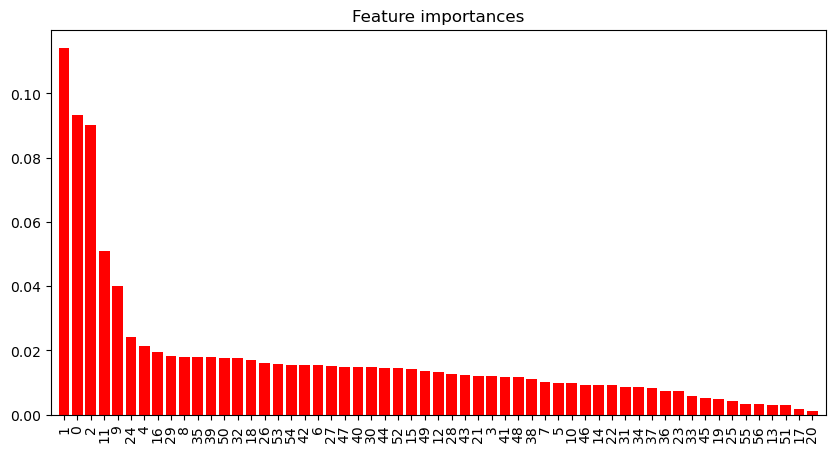

In [33]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualize the important features
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


### The feature importances attribute of the decision tree model is used to obtain the importance score of each feature. These scores are then combined with the corresponding feature names into a Pandas Series object. The sort values method is used to sort the feature importance scores in descending order, so that the most important features appear at the top of the list. The resulting feature importance series can be used for further analysis or visualization of the importance of each feature.










### Conclusion: The credit risk dataset is a helpful tool for examining the traits of credit applicants and their repayment capacity. Our descriptive analysis of the dataset revealed that the majority of the clients had asked for credit for household and auto needs, were employed, and had no history of default. Further investigation showed that a sizable fraction of clients had both high debt-to-income ratios and low credit scores, suggesting that they may be more likely to fail on their credit. The prescriptive research also revealed how crucial it is to consider elements like credit history, employment position, and loan size when estimating the probability of a default on a loan.

### Recommendation: Based on the study of the credit risk dataset, we advise lenders to thoroughly assess a potential borrower's creditworthiness before approving a credit. This entails thoroughly investigating the borrower's credit history and evaluating aspects of the borrower's ability to repay the loan, such as employment status, debt-to-income ratio, and loan size.
### Lenders can also create effective risk management strategies using the knowledge from our analysis, such as restricting loans to borrowers with better credit scores and lower debt-to-income ratios, or charging higher interest rates to borrowers with a higher default risk. Lenders can assure a healthy loan portfolio and lower the risk of credit defaults by using these strategies.





